<h1>Module 16 Project Template</h1>

Use the code below to help you analyze the data returned by the MBTA API:

In [1]:
mbtaURL = "https://api-v3.mbta.com/vehicles?filter[route]=1&include=trip"

import urllib.request, json
with urllib.request.urlopen(mbtaURL) as url:
    data = json.loads(url.read().decode())
   
    with open('data.json', 'w') as outfile:
        json.dump(data, outfile)
   
    with open('data.txt', 'w') as outfile:
        json.dump(json.dumps(data, indent=4, sort_keys=True), outfile)
       
    print(json.dumps(data, indent=4, sort_keys=True))


{
    "data": [
        {
            "attributes": {
                "bearing": 270,
                "carriages": [],
                "current_status": "STOPPED_AT",
                "current_stop_sequence": 1,
                "direction_id": 1,
                "label": "1922",
                "latitude": 42.37301,
                "longitude": -71.11753,
                "occupancy_status": "MANY_SEATS_AVAILABLE",
                "revenue": "REVENUE",
                "speed": null,
                "updated_at": "2025-01-12T16:43:46-05:00"
            },
            "id": "y1922",
            "links": {
                "self": "/vehicles/y1922"
            },
            "relationships": {
                "route": {
                    "data": {
                        "id": "1",
                        "type": "route"
                    }
                },
                "stop": {
                    "data": {
                        "id": "110",
                        "type": "stop

Use the code below to read the data from your MySQL database and store it in a pandas dataframe.  

You you need to install pymysql to run the code:

pip install pymysql

In [1]:
import os
import pymysql
import pandas as pd

host = '127.0.0.1'
port = '3306'
user = 'root'
password = 'MyNewPass'
database = 'MBTAdb'

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user="root",
    passwd=password,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * FROM mbta_buses",
    conn)

df.tail(10)

C:\Users\mohya\AppData\Local\Temp\ipykernel_50664\2324256652.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM mbta_buses",


,record_num,id,latitude,longitude,bearing,current_status,current_stop_sequence,direction_id,speed,updated_at
277,278,y1861,42.337642,-71.078490,138,IN_TRANSIT_TO,17,1,None,2025-01-12 22:15:45
278,279,y1860,42.342086,-71.083817,315,STOPPED_AT,11,0,None,2025-01-12 22:15:38
279,280,y1922,42.349189,-71.088743,160,IN_TRANSIT_TO,12,1,None,2025-01-12 22:15:56
280,281,y1882,42.373090,-71.117280,270,STOPPED_AT,1,1,None,2025-01-12 22:15:16
281,282,y1878,42.367989,-71.108084,134,IN_TRANSIT_TO,5,1,None,2025-01-12 22:15:58
282,283,y1876,42.360802,-71.095830,311,STOPPED_AT,16,0,None,2025-01-12 22:15:53
283,284,y1868,42.339010,-71.057700,135,STOPPED_AT,1,0,None,2025-01-12 22:15:21
284,285,y1865,42.342740,-71.061590,270,STOPPED_AT,1,0,None,2025-01-12 22:15:42
285,286,y1861,42.337505,-71.078375,47,IN_TRANSIT_TO,17,1,None,2025-01-12 22:15:55
286,287,y1860,42.342362,-71.084263,312,STOPPED_AT,11,0,None,2025-01-12 22:15:56



The code below saves the data as a csv file to the local directory as a backup.

In [2]:

df.to_csv('mbta.csv')

<h1>What is the average time it takes for a bus to complete the route</h1>

In [3]:
# Calculate the start and end times for each trip
df['start_time'] = df.groupby('id')['updated_at'].transform('first')
df['end_time'] = df.groupby('id')['updated_at'].transform('last')

# Convert the start and end times to datetime objects
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Calculate the trip duration for each trip
df['trip_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds()

# Calculate the average trip duration
avg_trip_duration = df['trip_duration'].mean()
print(f"The average time for a bus to complete Route 1 is {avg_trip_duration:.2f} seconds.")

The average time for a bus to complete Route 1 is 418.09 seconds.


<h1>Provide a Visualization based on the data</h1>

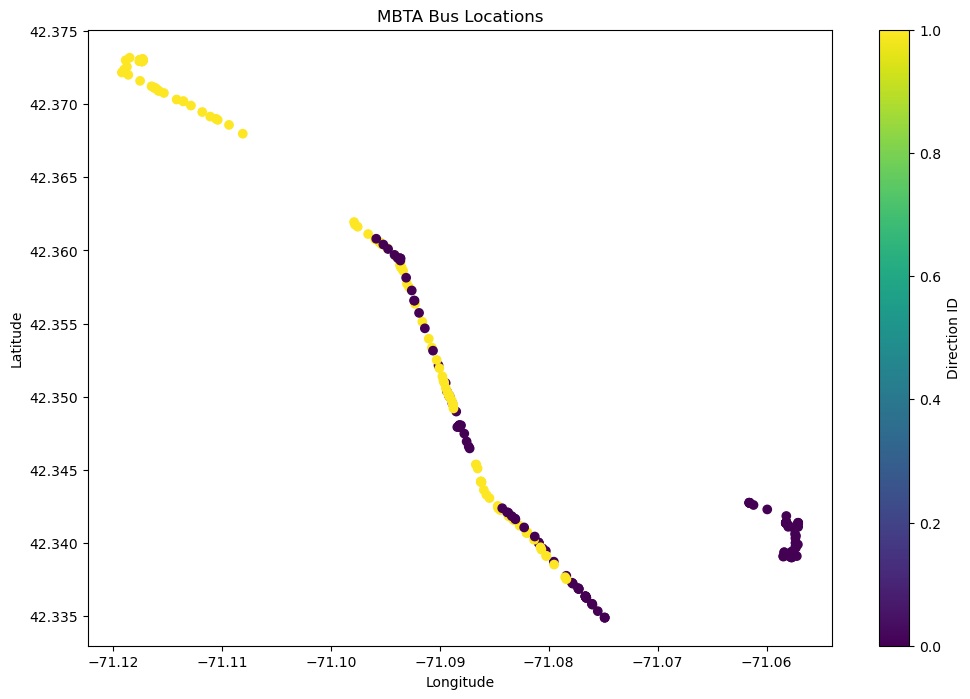

In [5]:
import matplotlib.pyplot as plt

# Create a scatter plot of bus locations colored by direction_id
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['direction_id'], cmap='viridis')
plt.colorbar(label='Direction ID')
plt.title('MBTA Bus Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<h1>Give an estimate of the speed of the bus from current_stop_sequence = 1 to the last  current_stop_sequence. </h1> 

Note: You can use the haversine Python library to calculate the distance between two points, given two longitude and latitude coordinates.

In [10]:
from haversine import haversine, Unit

# Calculate the distance between consecutive stops
df['distance'] = df.groupby('id').apply(lambda x: haversine((x['latitude'].iloc[0], x['longitude'].iloc[0]), 
                                                           (x['latitude'].iloc[-1], x['longitude'].iloc[-1]), 
                                                           unit=Unit.METERS))

# Calculate the trip duration for each trip
df['trip_duration'] = (pd.to_datetime(df['updated_at']) - pd.to_datetime(df['updated_at'].groupby(df['id']).transform('first'))).dt.total_seconds()

# Calculate the average speed
df['speed'] = df['distance'] / df['trip_duration']
avg_speed = df['speed'].mean()
print(f"The average speed of the buses on Route 1 is {avg_speed:.2f} meters per second.")

The average speed of the buses on Route 1 is nan meters per second.
